In KMeans clustering, we group unsupervised data into 'K' groups, and therefore the name 'K' Means. Generally, we can choose the value on our own or it can also be chosen by a method called 'elbow method'. For eg., in case of samples of T-shirts of different sizes, we can group them into 3 categories - Small, Medium, and Large. 

These are the steps of clustering process:

1. Initialize K randomly chosen centroids to start with. 
2. Then, assign centroids to each of the points according to the minimum Euclidean distance from each of the centroids. This process groups the centroids  into K groups.
3. Now, determine the mean of each of the groups. Those means will serve as the new centroids.
4. Repeat the process 2 and 3 till the centroids don't change their positions, i.e., till convergence.
5. And, you are done with KMeans clustering. 

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import operator 
%matplotlib inline

In [2]:
class KMeans:
    def __init__(self, data, n_centroids):
        
        self.n_centroids = n_centroids 
        self.data = data
        self.centroids = []
        self.col_dict = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'pink', 5:'black'}
        
   
    def closest_centroid(self): #returns a dictionary containing the points 
        #as keys and closest centroids assigned to them as values
        centroid_dict = {}
        closest_dict = {}
        
        #looping over the points in dataset
        for point in self.data:
            
            #we are comparing each point with the centroids and storing their
            #distaces
            for i, c in enumerate(self.centroids):
                centroid_dict[i] = np.linalg.norm(c-point)
            
            #closest stores the centroid closest to that point 
            closest = min(centroid_dict.items(), key=operator.itemgetter(1))[0]
            
            #finally, for each point we are storing the corresponding centroids
            closest_dict[tuple(point)] = closest
            
        return closest_dict
    
    
    def update_centroid(self): #computes the mean of points grouped according 
        #to the 'closest_centroid' function and finally returns the centroid 
        #determined by the mean as well as the closest_dict originally returned
        #by closest_centroid 
        
        #calling the functon 'closest_centroid' and storing the closest_dict 
        #returned by the function
        closest_dict = self.closest_centroid()
        centroid_list = []
    
        for i in range(self.n_centroids):
            temp = []
            
            #we are looping over the closest_dict dictionary and storing the 
            #points assigned to each centroid. In the centroid_list we will
            #be updating the mean of those points 
            for key, value in closest_dict.items():
                if value==i:
                    temp.append(key)
            mean = np.mean(temp, axis=0)
            centroid_list.append(mean)
            
        return centroid_list, closest_dict
    
    
    def fit(self):
        
        iteration = 0
        
        #random centroids created
        for _ in range(self.n_centroids):
            self.centroids.append(np.array([np.random.randint(min(self.data[:,0]), max(self.data[:,0])), 
                              np.random.randint(min(self.data[:,0]), max(self.data[:,0]))]))
                             
        current_centroids = self.centroids
        
        #initial_centroids stores the centroids randomly created in the beginning
        #these centroids will be shown with 'star' marker in black to show the
        #difference in position of initial centroids and final centroids 
        self.initial_centroids = np.copy(self.centroids)
        
        while True:
            
            self.centroids, _ = self.update_centroid()
            
            #checks if the current_centroid and self.centroids are equal
            #if equal, then the loop terminates 
            if np.array_equal(self.centroids, current_centroids) == True:
                print('Finished with {} iterations'.format(iteration))
                return 
            
            #if not equal, we will increment iteration by one and again the
            #current_centroids is updated with the value of self.centroids 
            iteration +=1
            
            current_centroids = self.centroids 
        
        
                                  
            
    def show(self):
        
        closest_dict_values = []
        _, closest_dict = self.update_centroid()
        
        #we are appending a list of the centroids which are indicated simply by
        #whole numbers. This list will be useful to determine the colors of the
        #points according to the assigned centroids 
        for k, v in closest_dict.items():
            closest_dict_values.append(v)
            
        #we are plotting the datapoints grouped according to the assigned centroids
        for i in range(len(self.data)):
            plt.scatter(self.data[i][0], self.data[i][1], 
                        color=self.col_dict[closest_dict_values[i]])
        
        #here we are plotting the final centroids
        for i in range(len(self.centroids)):
            plt.scatter(self.centroids[i][0], self.centroids[i][1], color=self.col_dict[i], 
                        marker = 'x', s=150)
            
        #these are the initial centroids. From here, we progressed to the final
        #centroids. These are indicated by black colors avoid confusion
        for i in range(len(self.initial_centroids)):
            plt.scatter(self.initial_centroids[i][0], self.initial_centroids[i][1], color='black', 
                        marker = '*', s=150)
            
        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        plt.title('K-Means clustering')
        
        plt.show()
    
            
     #Yieppee...We are done!

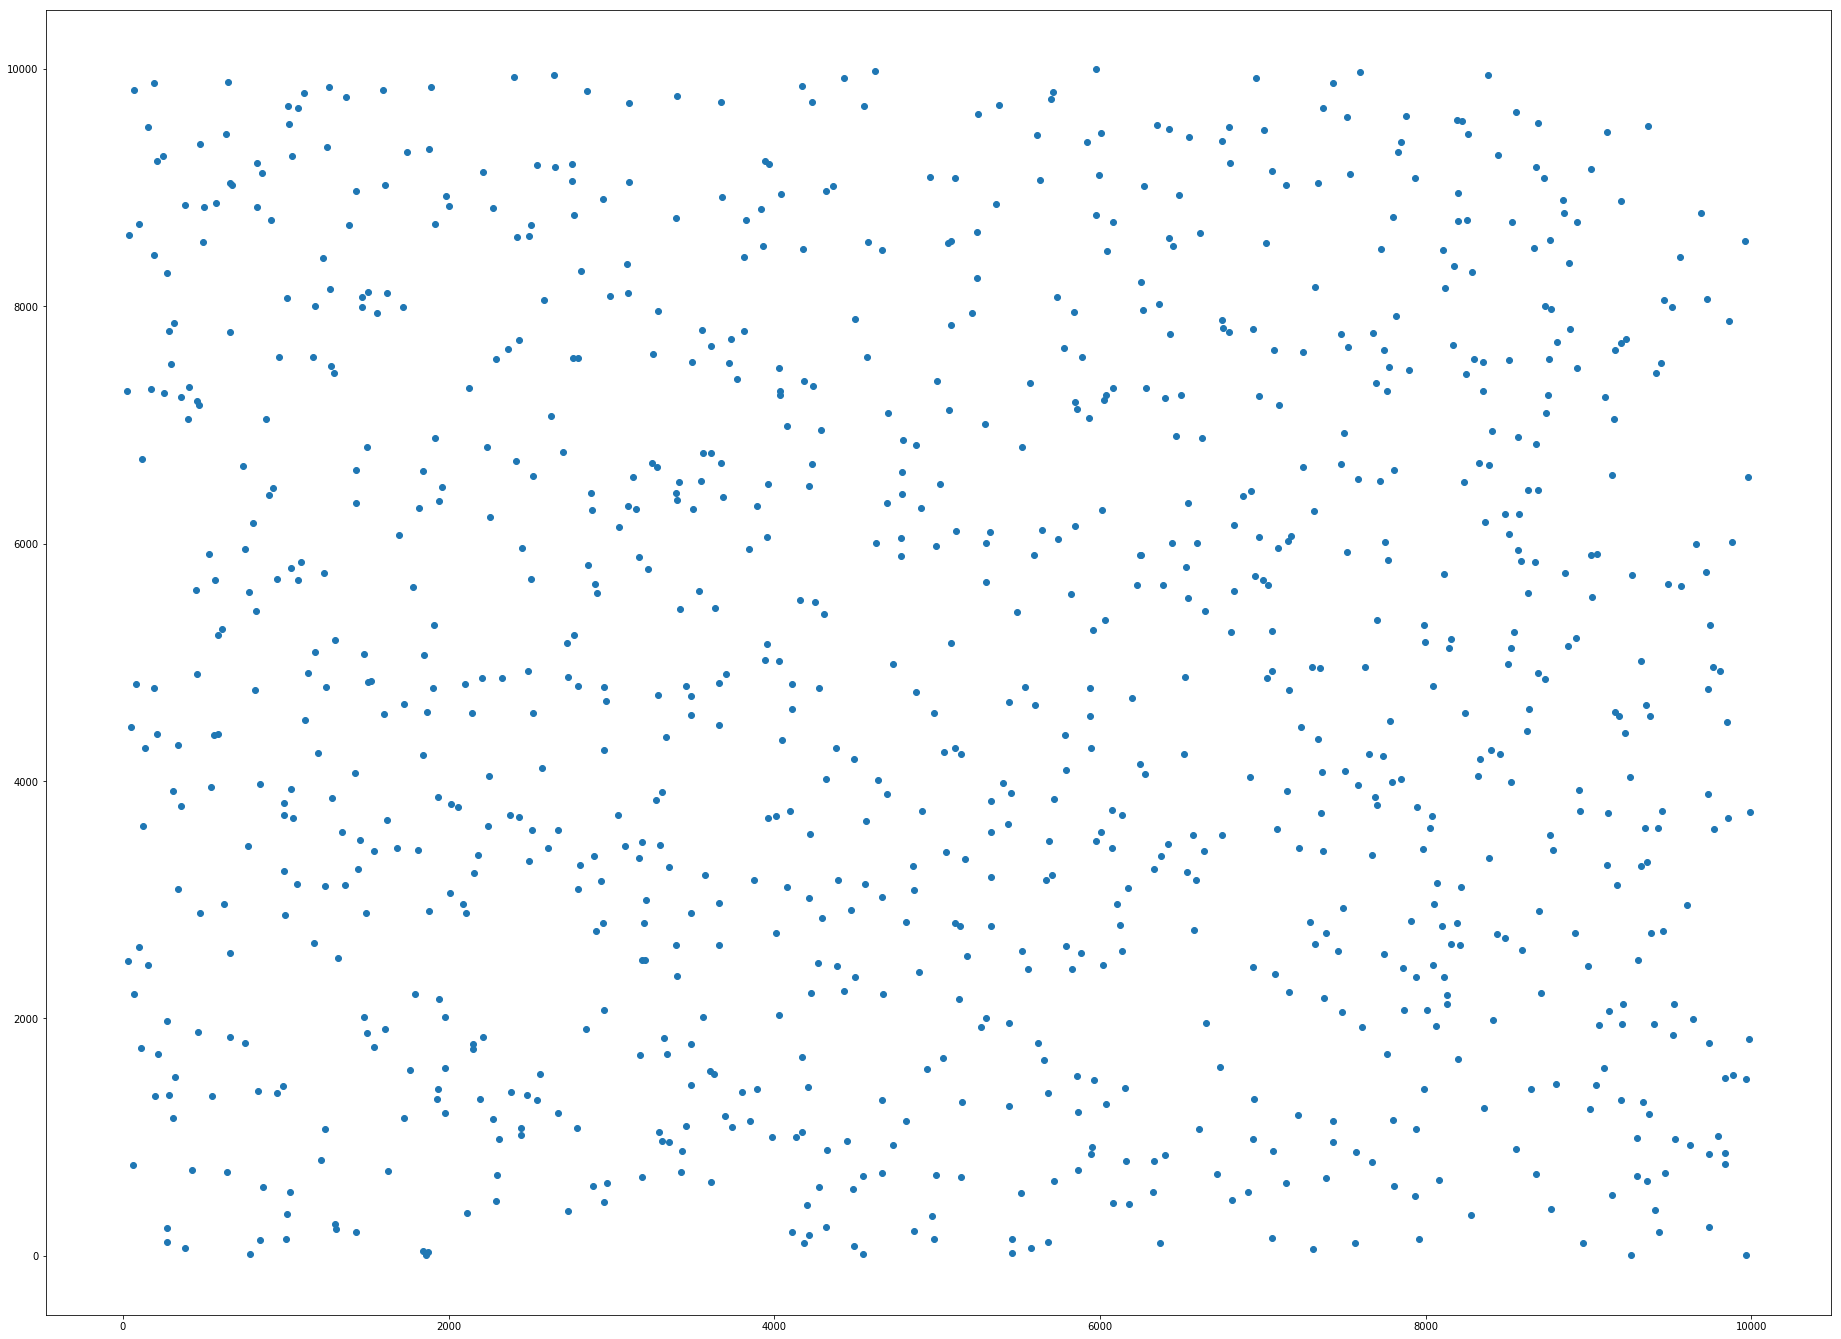

In [3]:
x = []

for _ in range(1000):
    x.append([np.random.randint(10000), np.random.randint(10000)])
    
x = np.array(x)

fig = plt.figure(figsize = (32, 24))

plt.scatter(x[:,0], x[:,1])
plt.show()

Finished with 19 iterations


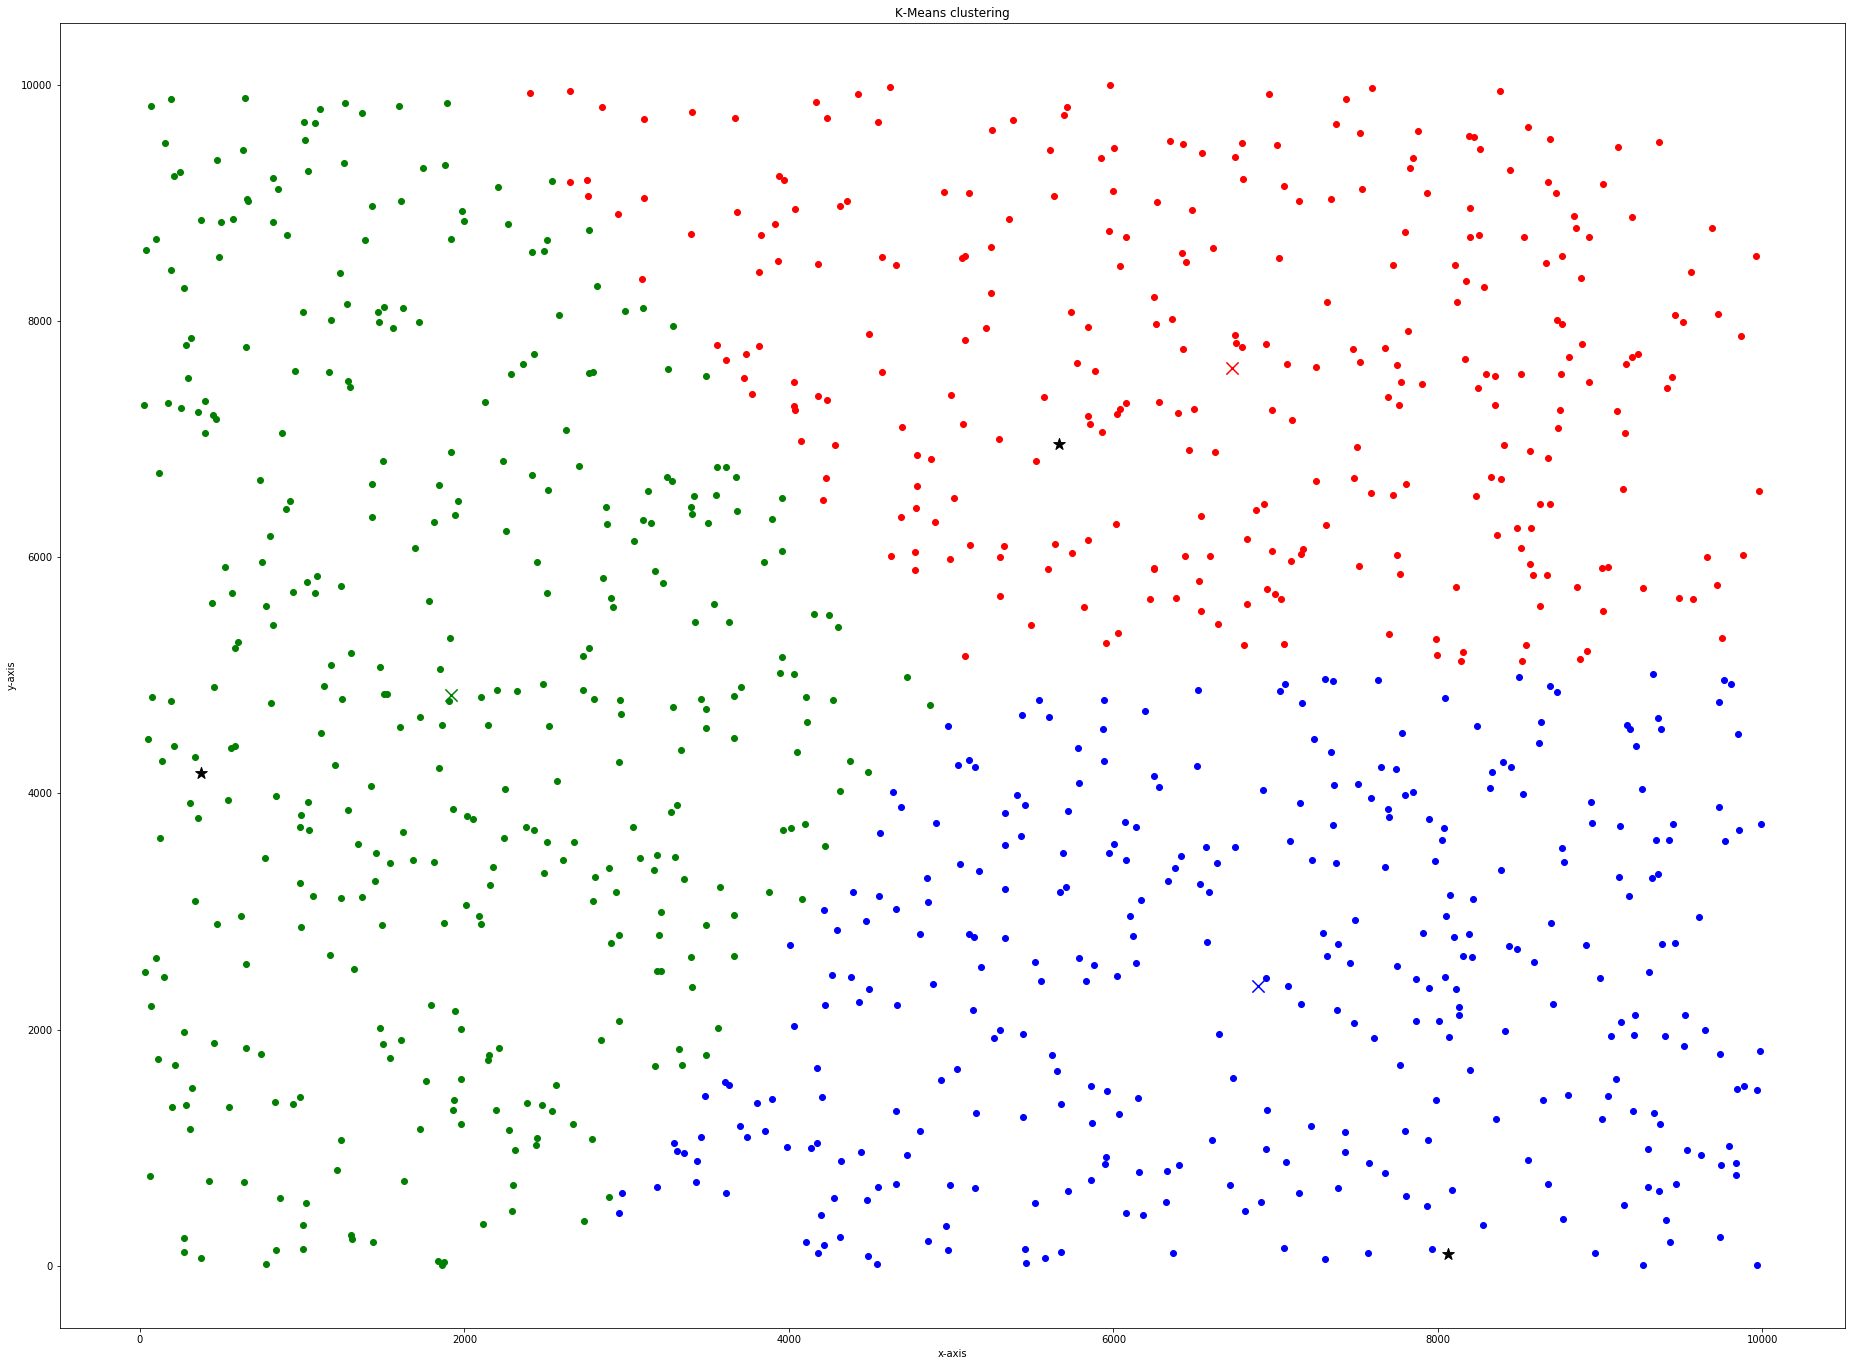

In [4]:
np.random.seed(100) #Just to check the randomly chosen centroids don't change
                    #eveytime
    
#calling 'kmeans' object of KMeans class
fig = plt.figure(figsize = (32, 24))
kmeans = KMeans(x, 3)
kmeans.fit()
kmeans.show()
